In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('hepatitis_csv.csv')

In [17]:
data=pd.DataFrame(data)
print(data.head())
data.columns

   age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0   30    male   False       False   False   False    False     False   
1   50  female   False       False    True   False    False     False   
2   78  female    True       False    True   False    False      True   
3   31  female     NaN        True   False   False    False      True   
4   34  female    True       False   False   False    False      True   

  liver_firm spleen_palpable spiders ascites varices  bilirubin  \
0      False           False   False   False   False        1.0   
1      False           False   False   False   False        0.9   
2      False           False   False   False   False        0.7   
3      False           False   False   False   False        0.7   
4      False           False   False   False   False        1.0   

   alk_phosphate   sgot  albumin  protime  histology class  
0           85.0   18.0      4.0      NaN      False  live  
1          135.0   42.0      3.5    

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

### TO CHECK RELATIONSHIP BETWEEN CONTINOUS VARIABLES, WE USE CORRELATION.

We see that no two variables are highly correlated as the abs(correlation values) of all is less than 0.4

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.013100,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
antivirals,0.013100,1.000000,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242
bilirubin,0.125463,-0.185023,1.000000,0.220062,0.232967,-0.377318,-0.302608,0.262428
alk_phosphate,0.008924,-0.205236,0.220062,1.000000,0.239581,-0.403857,-0.226846,0.284914
sgot,0.082545,-0.108138,0.232967,0.239581,1.000000,-0.136276,-0.189149,0.131125
albumin,-0.262981,0.170074,-0.377318,-0.403857,-0.136276,1.000000,0.424419,-0.324751
protime,-0.222233,0.030287,-0.302608,-0.226846,-0.189149,0.424419,1.000000,-0.312062
histology,0.170780,-0.209242,0.262428,0.284914,0.131125,-0.324751,-0.312062,1.000000


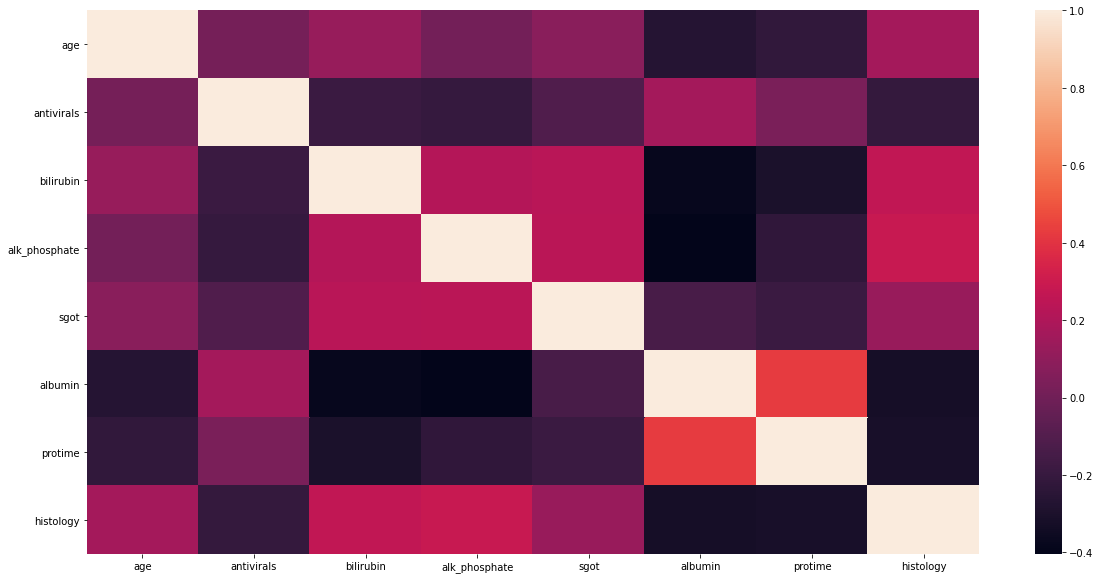

In [18]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c)
c

In [19]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [20]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


### IMPUTING MISSING VALUES AS MEAN

In [21]:
X = data.iloc[:, :].values

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 2:19] = imputer.fit_transform(X[:, 2:19])

### ENCODING CATEGORICAL VARIABLES

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X[:,18] = le.fit_transform(X[:,18])
X[:,19] = le.fit_transform(X[:,19])

In [24]:
X=pd.DataFrame(X)
X.columns=data.columns
X.tail()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,105.325,242,3.3,50,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126,142,4.3,61.8523,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75,20,4.1,61.8523,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81,19,4.1,48,1,1
154,43,0,1,0,1,0,0,1,0,1,1,1,0,1.2,100,19,3.1,42,1,0


Using boxplot we can check outliers of the variables


WE SEE THAT ONLY AGE AND ALBUMIN FOLLOWS A NORMAL DISTRIBUTION

Billirubin, alk_phosphate,sgot are right skewed and protime is left skewed

To normalise bilirubin, alk_phosphate,sgot, protime we can do log or inverse tranformation

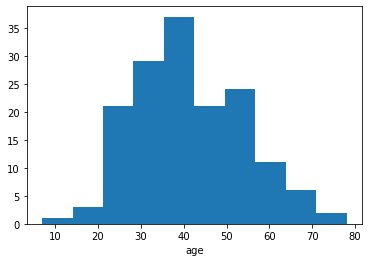

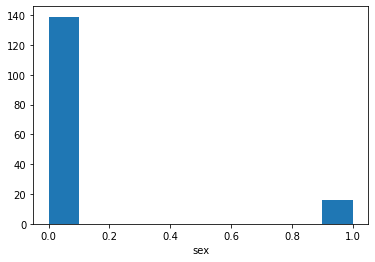

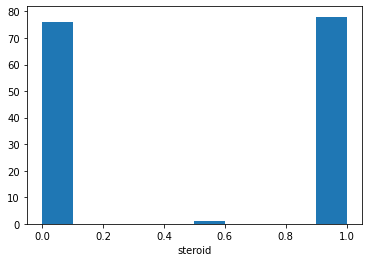

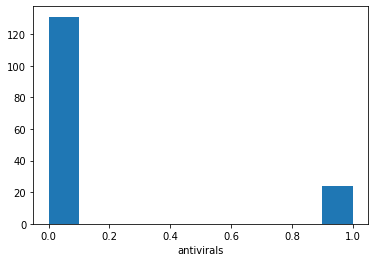

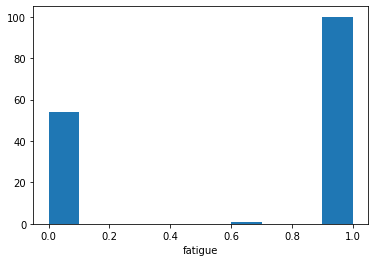

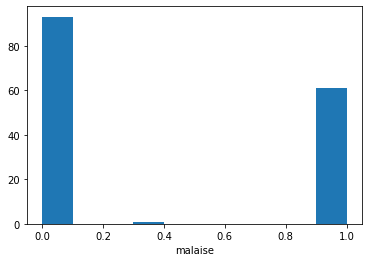

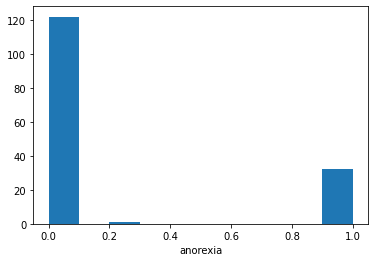

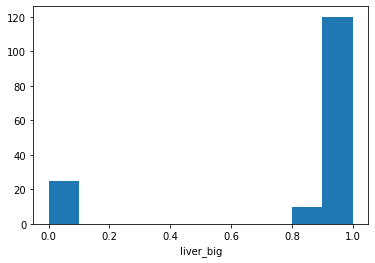

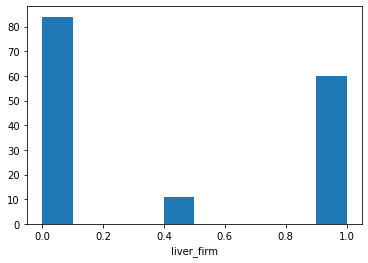

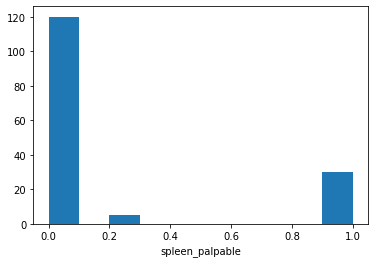

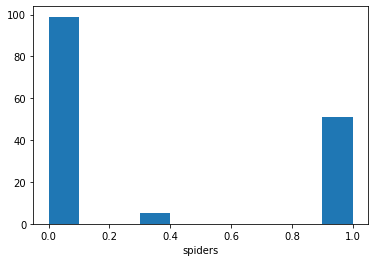

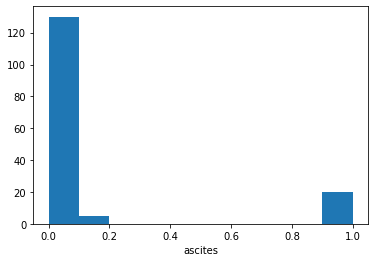

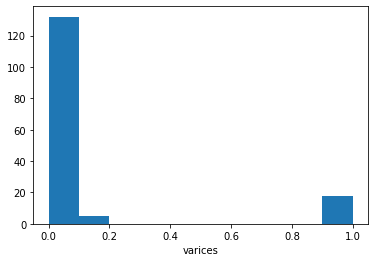

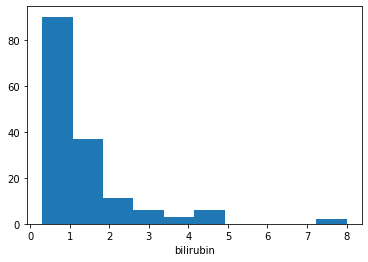

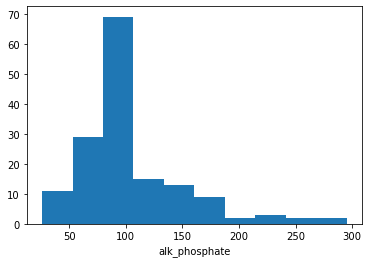

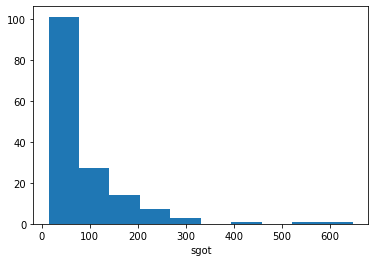

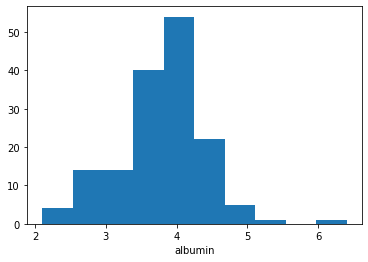

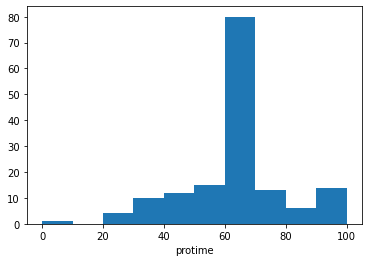

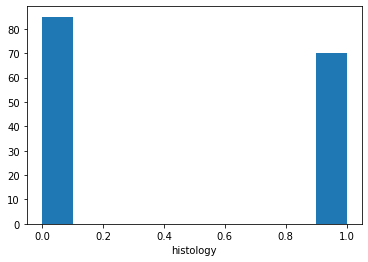

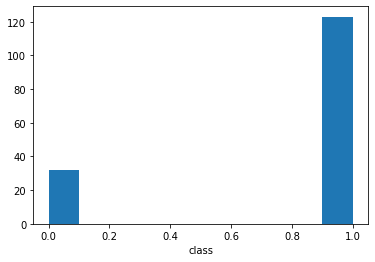

In [25]:
def plots(dist):
    plt.hist(X[dist])
    plt.xlabel(dist)
    plt.show()
    
for x in X:
    plots(x)

### DIVIDING THE VARIABLES INTO DEPENDENT AND INDEPENDENT VARIABLES

In [26]:
x=X.iloc[:, :-1].values
y=X.iloc[:, -1].values

We see that the dependent variable class is highly imbalanced. This can be corrected using SMOTE which is Synthetic Minority Oversampling Technique. It will make sure that the class variable is balanced by adding dummy data.

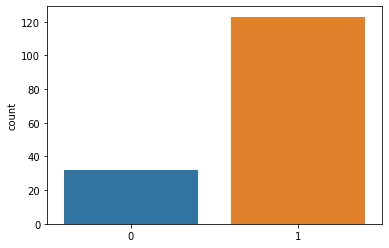

In [27]:
sns.countplot(y)